In [1]:
import cv2
import numpy as np
from skimage import img_as_float
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('lab.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)


In [3]:
contours,_ = cv2.findContours(th,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

8

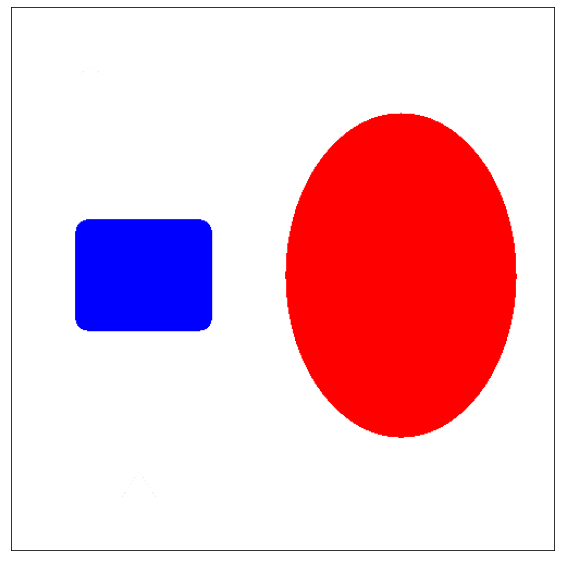

In [20]:
out=img.copy()
cv2.drawContours(out, contours, 0, (255,255,255), -1);
cv2.drawContours(out, contours, 5, (255,255,255), -1);
cv2.drawContours(out, contours, 6, (255,255,255), -1);
cv2.drawContours(out, contours, 3, (0,0,255), -1);  #squar
#cv2.drawContours(out, contours, 1, (0,0,255), -1);  #circuit in squar
cv2.drawContours(out, contours, 4, (255,0,0), -1); #oval shape
#cv2.drawContours(out, contours, 2, (255,255,0), -1); #rectangle in side oval
plt.figure(figsize=(20,10))
plt.xticks([]); plt.yticks([])
plt.imshow(out);

In [5]:
mask = np.ones(th.shape[:2], dtype="uint8") * 255
image = cv2.bitwise_and(contours, contours[0], mask=mask)
cv2.drawContours(mask, contours, 0, (255,255,255), -1)


TypeError: Expected Ptr<cv::UMat> for argument 'src1'

In [12]:
mask = np.ones(th.shape[:2], dtype="uint8") * 255
# loop over the contours
counter=0
for c in contours:
	# if the contour is bad, draw it on the mask
	if counter==0 or counter==5 or counter==6:
		cv2.drawContours(mask, c, -1, (0,0,255), 2)
		#cv2.drawContours(mask, [c], -1, 0, -1)
	counter+=1

In [14]:
    cv2.imshow('Output', contours)

TypeError: Expected Ptr<cv::UMat> for argument 'mat'

In [4]:
def nothing(x):
    pass

reter = [
    cv2.RETR_LIST,
    cv2.RETR_TREE,
    cv2.RETR_CCOMP,
    cv2.RETR_EXTERNAL
    ]

approx= [
    cv2.CHAIN_APPROX_NONE,
	cv2.CHAIN_APPROX_SIMPLE
]

strRet = [
    'List',
    'Tree',
    'CCOMP',
    'External'
]

cv2.namedWindow('Output')

cv2.createTrackbar('hir', 'Output', 0, len(reter)-1, nothing)
cv2.createTrackbar('app', 'Output', 0, len(approx)-1, nothing)

font = cv2.FONT_HERSHEY_COMPLEX

while 1:
    out = img.copy()

    hir = cv2.getTrackbarPos('hir', 'Output')
    app = cv2.getTrackbarPos('app', 'Output')
    
    cv2.putText(
        out,
        ('Ret: {} Approx: {}').format(strRet[hir], app),
        (10, out.shape[0]-20),
        font, 1, (255, 100, 0), 2, cv2.LINE_AA)
    
    contours, _ = cv2.findContours(th, reter[0], approx[app])
    cv2.drawContours(out, contours, -1, (0, 255, 0), 2)
    print (len(contours))
    counter=0
    cnts = list(filter(lambda x: (cv2.arcLength(x, True) > 200), contours))

    cv2.drawContours(out, cnts, -1, (0,0,255), 2)
    for contour in cnts:
        #cv2.bitwise_and([contour], [contour], mask=mask)
        cv2.drawContours(out, [contour], 0, (0, 0, 255), 3)

    
        cv2.imshow('Output', out)

        k = cv2.waitKey(0)
        if k == 27:
            break
    
    cv2.imshow('Output', out)
    k = cv2.waitKey(0)
    if k == 27:
        break

cv2.destroyAllWindows()

8
8
8
8
8
8


array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

In [23]:
len(contours)

8